<a href="https://colab.research.google.com/github/vanya890/AI_Study_Colab/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%965_%D0%9A%D1%83%D0%B7%D1%8B%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторная работа №5
 Сверточные нейронные сети

Структура сверточной нейронной сети


Создание простой модели сверточной нейронной сети

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
#input_shape=(img_height, img_width, channels)
input_h = 28
input_w = 56
size = 3
pad = (size - 1) // 2
stride = 1

# Первый сверточный слой
model.add(Conv2D(8, (3, 3), padding='same', activation='relu', input_shape=(input_h, input_w, size)))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Первый сверточный слой принимает на вход цветное изображение (3 канала) размерами 28 на 56 пикселей, форма входящего массива - (28, 56, 3).
Внутри слоя к нему применяется свертка 8-ю фильтрами (3, 3) с шагом смещения (1, 1), а затем функция активации relu. padding ='same', stride=(1,1) по умолчанию;
вычислим pad = (size - 1) / 2 = (3-1) /2 = 1.
Используем формулу:
output_h = (input_h + 2 * pad - size) // stride + 1 # (28 + 2 * 1 - 3) // 1 + 1 = 27 + 1 = 28
output_w = (input_w + 2 * pad - size) // stride + 1 # (56 + 2 * 1 - 3) // 1 + 1 = 55 + 1 = 56


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 56, 8)           │             224 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224 (896.00 B)

 Trainable params: 224 (896.00 B)

 Non-trainable params: 0 (0.00 B)

Добавим  следующий сверточный слой c 5 фильтрами с ядром (3, 2), шагом смещения (2, 3) и padding ='valid':

In [ ]:
# Второй сверточный слой
model.add(Conv2D(5, (3, 2), strides = (2,3), padding='valid', activation='relu'))

Если padding='valid', то по правилам pad = 0. Подставим значения:
output_h = (input_h + 2 * 0 - size) // 2 + 1  # (28 + 2 * 0 - 3) // 2 + 1 = 25 // 2 + 1 = 12 + 1 = 13
output_w = (input_w + 2 * 0 - size) // 3 + 1 # (56 + 2 * 0 - 2) // 3 + 1 = 54 // 3 + 1 = 18 + 1 = 19


5 фильтров, форма данных на выходе - (13, 19, 5).

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 56, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 19, 5)           │             245 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 469 (1.83 KB)

 Trainable params: 469 (1.83 KB)

 Non-trainable params: 0 (0.00 B)

Применим слой MaxPooling2D:

In [ ]:
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(3, 3)))

MaxPooling2D изменит форму данных следующим образом (учитывая, что stride=pool_size):

 output_h = (input - pool_size) // strides + 1 = (13 - 3) // 3 + 1 = 4
 output_w = (input - pool_size) // strides + 1 = (19 - 3) // 3 + 1 = 6



Глубина в MaxPooling2D не меняется, выходная форма данных (4, 6, 5).

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 56, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 19, 5)           │             245 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 4, 6, 5)             │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 469 (1.83 KB)

 Trainable params: 469 (1.83 KB)

 Non-trainable params: 0 (0.00 B)

Далее слой Flatten преобразует входящий тензор в одномерный вектор.

In [ ]:
model.add(Flatten())
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 56, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 19, 5)           │             245 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 4, 6, 5)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 120)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 469 (1.83 KB)

 Trainable params: 469 (1.83 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 56, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 19, 5)           │             245 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 4, 6, 5)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │             363 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 832 (3.25 KB)

 Trainable params: 832 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

**Распознавание изображений из набора данных MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist #
from tensorflow.keras.datasets import cifar10 #
from tensorflow.keras.datasets import cifar100 #

from tensorflow.keras.models import Sequential
#Базовые слои для свёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import math
import os
from google.colab import drive

%matplotlib inline
drive.mount('/content/drive/')

Mounted at /content/drive/


Подготовка данных

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


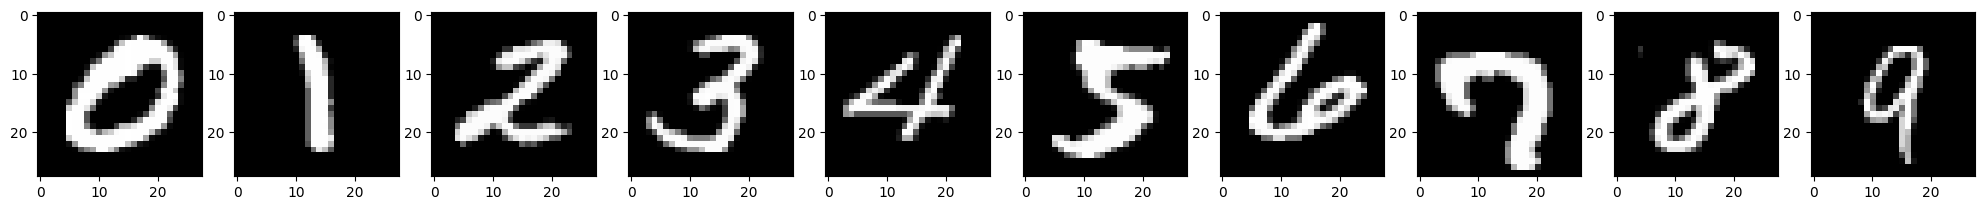

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [ ]:
#Загружаем MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape
(60000, 28, 28)
#Выводим  картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3))
for i in range(10):
  label_indexes = np.where(y_train==i)[0]
  index = random.choice(label_indexes)
  img = x_train[index] #
  axs[i].imshow(Image.fromarray(img), cmap='gray') #
plt.show() #
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

#Меняем формат данных MNIST
#Добавляем одну размерность для подачи на вход сверточного слоя
# чёрно-белые данные
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# Посмотрим форматы выборок перед обучением
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


Нейронная сеть
Создаем архитектуру нейронной сети


In [ ]:
#задаём batch_size
batch_size = 20000
#Создаем последовательную модель
model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(28, 28, 1)))
#Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(256, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 28, 28, 1)           │               4 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │       1,605,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,618,030 (6.17 MB)

 Trainable params: 1,618,028 (6.17 MB)

 Non-trainable params: 2 (8.00 B)

#Обучаем сеть на данных mnist

In [ ]:
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 142s 48s/step - accuracy: 0.2610 - loss: 2.1369 - val_accuracy: 0.7104 - val_loss: 1.2757
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 140s 47s/step - accuracy: 0.7245 - loss: 1.0873 - val_accuracy: 0.8319 - val_loss: 0.9744
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 144s 48s/step - accuracy: 0.8207 - loss: 0.5735 - val_accuracy: 0.8640 - val_loss: 1.0138
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 146s 49s/step - accuracy: 0.8623 - loss: 0.4497 - val_accuracy: 0.8937 - val_loss: 0.8376
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 208s 51s/step - accuracy: 0.8861 - loss: 0.3847 - val_accuracy: 0.9070 - val_loss: 0.6896
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 139s 47s/step - accuracy: 0.9070 - loss: 0.3237 - val_accuracy: 0.9199 - val_loss: 0.5009
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 149s 50s/step - accuracy: 0.9213 - loss: 0.2621 - val_accuracy: 0.9300 - val_loss: 0.3645
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 205s 53s/step - accuracy: 0.9304 - loss: 0.2317 - val_accuracy: 0.9395 - val_loss:

Задание 1.
1.	Создать 3 архитектуры сверточной нейронной сети для распознавания рукописных цифр MNIST с различными параметрами и слоями.
2.	Вывести архитектуру сети.


In [ ]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))

model1.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(10, activation='softmax'))

model3.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,210 (137.54 KB)

 Trainable params: 35,018 (136.79 KB)

 Non-trainable params: 192 (768.00 B)

Задание 2. Определение цифр на реальных фотографиях
1.	Нарисуйте цифры, загрузите, переведите в формат для подачи в нейронную сети.
2.	Создайте собственную архитектуру сверточной нейронной сети для распознавания цифр на базе рукописных цифр MNIST.
3.	Обучите сеть и выведите результаты
4.	Оцените результаты работы сети на собственных цифрах..


In [ ]:
my_model = Sequential()
my_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
my_model.add(MaxPooling2D((2, 2)))
my_model.add(BatchNormalization())
my_model.add(Conv2D(64, (3, 3), activation='relu'))
my_model.add(MaxPooling2D((2, 2)))
my_model.add(BatchNormalization())
my_model.add(Flatten())
my_model.add(Dense(10, activation='softmax'))

my_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
my_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 13, 13, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 5, 5, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,210 (137.54 KB)

 Trainable params: 35,018 (136.79 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
my_model.fit(x_train, y_train, epochs=50, batch_size=20000)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 251ms/step - accuracy: 0.1415 - loss: 3.1029
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 249ms/step - accuracy: 0.6106 - loss: 1.1913
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - accuracy: 0.8016 - loss: 0.6432
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 0.8695 - loss: 0.4406
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.8941 - loss: 0.3478
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - accuracy: 0.9139 - loss: 0.2897
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step - accuracy: 0.9263 - loss: 0.2570
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.9356 - loss: 0.2262
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - accuracy: 0.9407 - loss: 0.2057
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - accuracy: 0.9446 - loss: 0.1899
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - accuracy: 0.9488 - loss: 0.1743
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - accuracy: 0.9539 - l

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


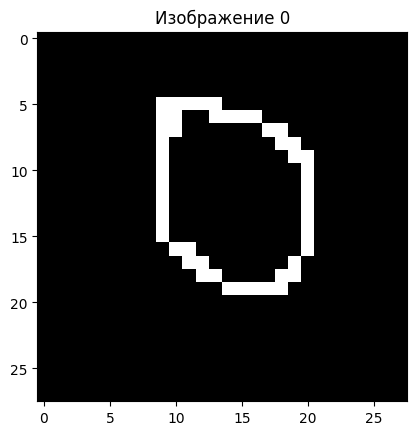

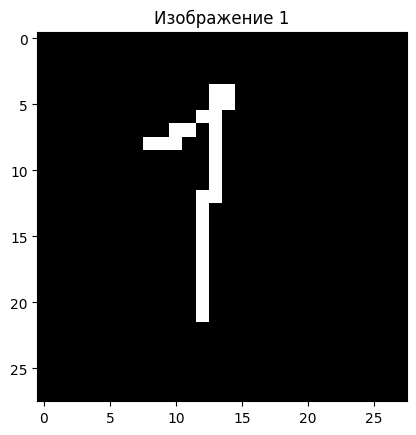

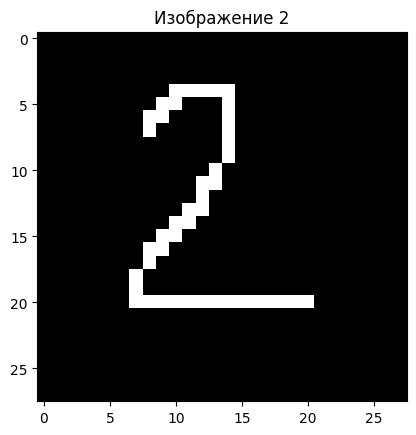

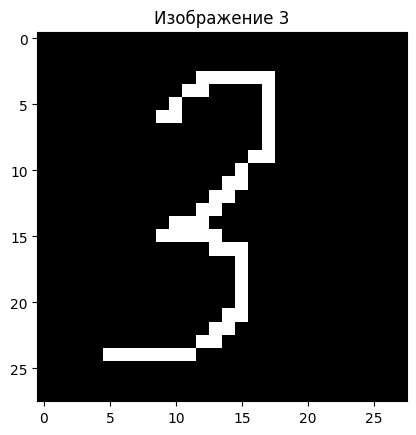

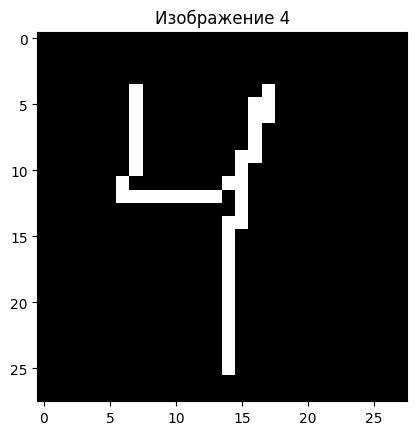

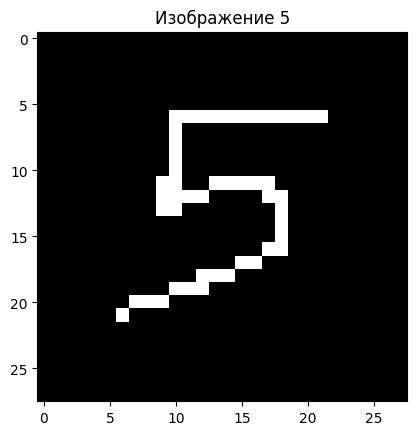

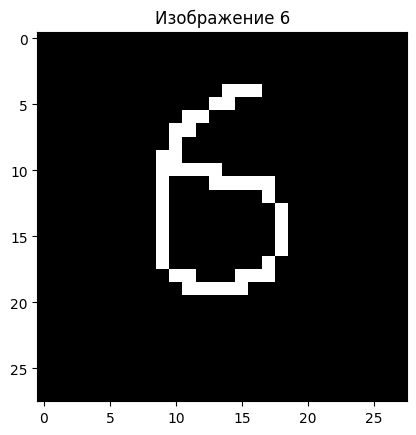

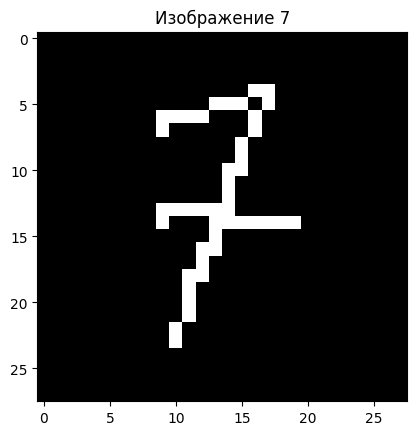

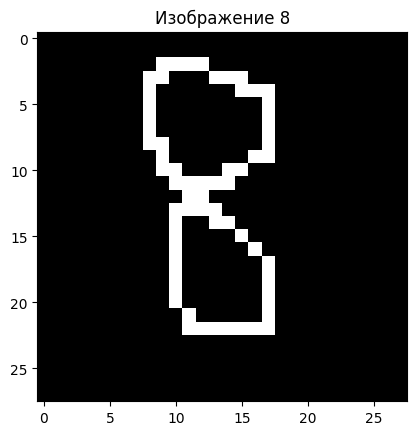

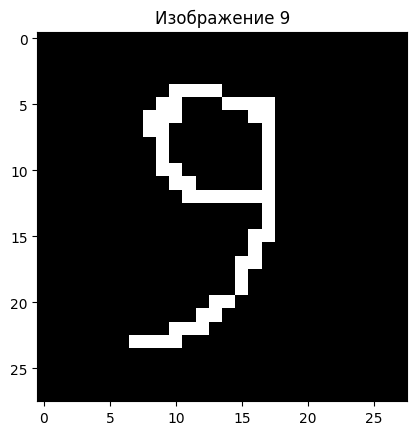

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Изображение 1: Предсказанный класс - 3
Изображение 2: Предсказанный класс - 7
Изображение 3: Предсказанный класс - 2
Изображение 4: Предсказанный класс - 3
Изображение 5: Предсказанный класс - 9
Изображение 6: Предсказанный класс - 5
Изображение 7: Предсказанный класс - 5
Изображение 8: Предсказанный класс - 3
Изображение 9: Предсказанный класс - 8
Изображение 10: Предсказанный класс - 3


In [ ]:
from google.colab import drive
import cv2
import numpy as np

# Подключаем Google Диск
drive.mount('/content/drive')

# Путь к папке с изображениями на Google Диске
folder_path = '/content/drive/My Drive/MNISTMy'

# Создаем пустой список для хранения изображений
my_images = []

# Загружаем изображения из папки
for i in range(10):
  image_path = f"{folder_path}/{i}.png"  # Предполагаем, что изображения называются 0.jpg, 1.jpg, ..., 9.jpg
  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Загружаем в оттенках серого
  img = cv2.resize(img, (28, 28))  # Изменяем размер до 28x28
  #img = img / 255.0  # Нормализуем значения пикселей
  my_images.append(img)
  plt.figure()
  plt.imshow(img, cmap='gray')
  plt.title(f"Изображение {i}")
  plt.show()

# Преобразуем список изображений в NumPy массив
my_images = np.array(my_images)

# Добавляем размерность для канала (если необходимо)
my_images = my_images.reshape(-1, 28, 28, 1)
# Загрузите ваши подготовленные изображения в переменную my_images
predictions = my_model.predict(my_images)

# Выведите предсказанные классы для каждого изображения
for i, prediction in enumerate(predictions):
    predicted_class = np.argmax(prediction)
    print(f"Изображение {i+1}: Предсказанный класс - {predicted_class}")

Задание 3.
1.	Используя датасет "Пассажиры автобуса" (bus.zip), создайте 2 модели  нейронной сети для решения задачи классификации пассажиров на входящих и выходящих.
2.	Обучите сеть и выведите результаты.
3.	Проверьте работу лучшей модели на тестовой выборке.


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import os
import numpy as np
import zipfile # import the zipfile module
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
drive.mount('/content/drive')

# Путь к папке с данными
data_dir = '/content/drive/MyDrive/Neuro/Lab5/bus'
# Путь к zip-архиву с данными
zip_file_path = '/content/drive/MyDrive/Neuro/Lab5/bus/bus.zip'

# Распаковка архива
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/bus_data')

# Размеры изображений
img_width, img_height = 90, 168  # Выберите подходящие размеры

# Создание списков для хранения данных и меток
x_train = []
y_train = []

# Загрузка данных из папок
for class_name in ['Входящий', 'Выходящий']:
    class_dir = os.path.join('/content/bus_data', class_name)
    label = 0 if class_name == 'Входящий' else 1
    for filename in os.listdir(class_dir):
        if filename.endswith('.jpg'):
            img_path = os.path.join(class_dir, filename)
            img = Image.open(img_path).convert('RGB')  # Преобразование в RGB
            img = img.resize((img_width, img_height))
            img_array = np.array(img) / 255.0  # Нормализация
            x_train.append(img_array)
            y_train.append(label)

# Преобразование списков в массивы NumPy
x_train = np.array(x_train)
y_train = np.array(y_train)

# Преобразование меток в one-hot encoding
y_train = to_categorical(y_train, num_classes=2)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:

# Создание первой модели
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(BatchNormalization())
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(BatchNormalization())
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(2, activation='sigmoid'))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

# Обучение первой модели
history1 = model1.fit(x_train, y_train, batch_size=3, epochs=10, validation_data=(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 88, 166, 32)         │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 44, 83, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 44, 83, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 42, 81, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 21, 40, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 21, 40, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 53760)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │       6,881,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,901,442 (26.33 MB)

 Trainable params: 6,901,250 (26.33 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/10
3027/3027 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7251 - loss: 8.8981
Epoch 2/10
3027/3027 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.7884 - loss: 0.5206
Epoch 3/10
3027/3027 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.7815 - loss: 0.5388
Epoch 4/10
3027/3027 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.7595 - loss: 0.5333
Epoch 5/10
3027/3027 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.7668 - loss: 0.5184
Epoch 6/10
3027/3027 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7782 - loss: 0.4999
Epoch 7/10
3027/3027 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.7841 - loss: 0.4924
Epoch 8/10
3027/3027 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7850 - loss: 0.4938
Epoch 9/10
3027/3027 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7847 - loss: 0.4840
Epoch 10/10
3027/3027 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.7912 - loss: 0.4649


In [6]:
model1.save('lab5-3model1.keras')

In [6]:

# Создание второй модели (более сложная)
model2 = Sequential()
model2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(BatchNormalization())
model2.add(Conv2D(256, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(BatchNormalization())
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(2, activation='sigmoid'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()
history2 = model2.fit(x_train, y_train, batch_size=3, epochs=10, validation_data=(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 88, 166, 64)         │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 44, 83, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 44, 83, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 42, 81, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 21, 40, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 21, 40, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 19, 38, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 9, 19, 256)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 9, 19, 256)          │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 43776)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      11,206,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,580,034 (44.17 MB)

 Trainable params: 11,579,138 (44.17 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/10
2422/2422 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - accuracy: 0.6973 - loss: 10.6745 - val_accuracy: 0.7991 - val_loss: 1.2678
Epoch 2/10
2422/2422 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.7881 - loss: 0.4971 - val_accuracy: 0.8129 - val_loss: 0.3804
Epoch 3/10
2422/2422 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8062 - loss: 0.4565 - val_accuracy: 0.7722 - val_loss: 1.1928
Epoch 4/10
2422/2422 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8269 - loss: 0.4026 - val_accuracy: 0.8657 - val_loss: 0.5404
Epoch 5/10
2422/2422 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8356 - loss: 0.3773 - val_accuracy: 0.8525 - val_loss: 0.7495
Epoch 6/10
2422/2422 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8383 - loss: 0.3648 - val_accuracy: 0.8420 - val_loss: 0.9022
Epoch 7/10
2422/2422 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8623 - loss: 0.3044 - val_accuracy: 0.8861 - val_loss: 0.3971
Epoch 8/10
2422/2422 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - accuracy: 0.8756 - loss:

In [5]:
model2.save('lab5-3model2.keras')

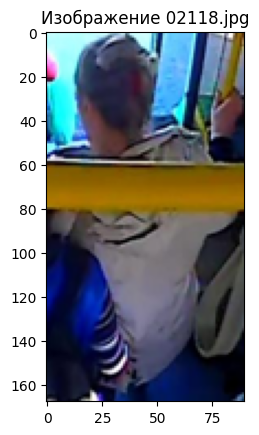

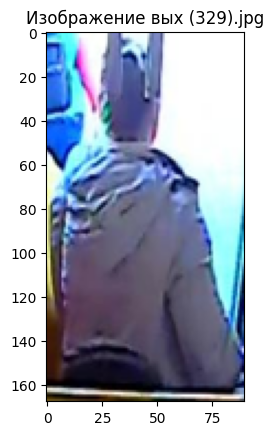

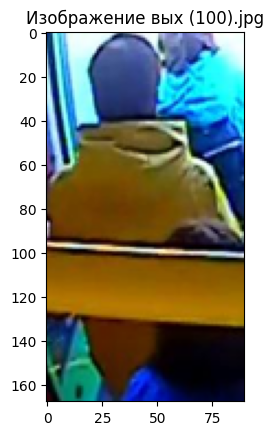

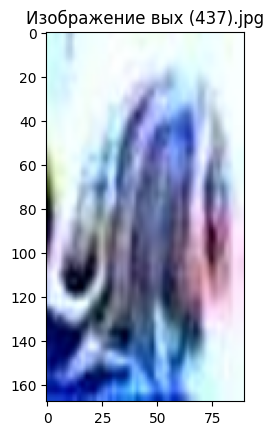

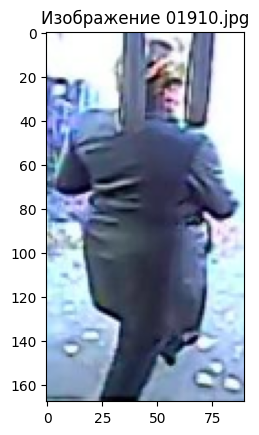

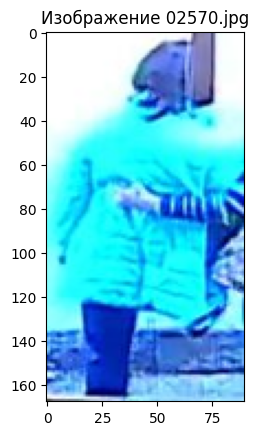

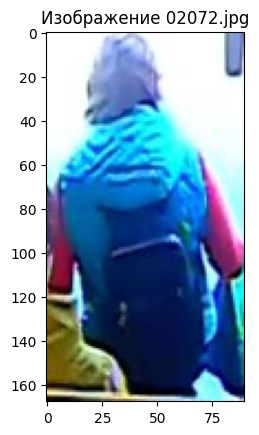

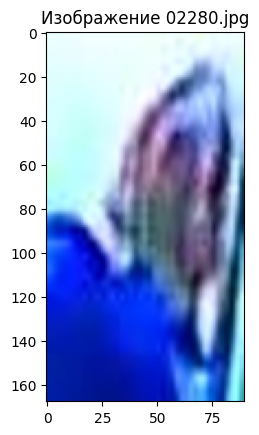

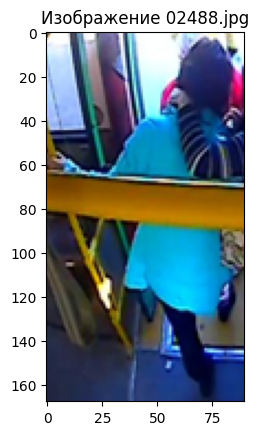

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step
Изображение 1: Предсказанный класс - 1
Изображение 2: Предсказанный класс - 1
Изображение 3: Предсказанный класс - 1
Изображение 4: Предсказанный класс - 1
Изображение 5: Предсказанный класс - 1
Изображение 6: Предсказанный класс - 1
Изображение 7: Предсказанный класс - 1
Изображение 8: Предсказанный класс - 1
Изображение 9: Предсказанный класс - 1


In [23]:
# Путь к папке с изображениями на Google Диске
folder_path = '/content/drive/MyDrive/Neuro/Lab5/test'

# Создаем пустой список для хранения изображений
my_images = []

# Загружаем изображения из папки
for filename in os.listdir(folder_path):
  img_path = os.path.join(folder_path, filename)
  img = Image.open(img_path).convert('RGB')  # Преобразование в RGB
  img = img.resize((img_width, img_height))
  img_array = np.array(img) / 255.0  # Нормализация
  my_images.append(img_array)
  plt.figure()
  plt.imshow(img, cmap='gray')
  plt.title(f"Изображение " + filename)
  plt.show()

# Преобразуем список изображений в NumPy массив
my_images = np.array(my_images)
# Загрузите ваши подготовленные изображения в переменную my_images
predictions = model2.predict(my_images)

# Выведите предсказанные классы для каждого изображения
for i, prediction in enumerate(predictions):
    predicted_class = np.argmax(prediction)
    print(f"Изображение {i+1}: Предсказанный класс - {predicted_class}")